In [20]:
# Import Dependencies
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func
from sqlalchemy import inspect
import datetime as dt
import pandas as pd 
import matplotlib.pyplot as plt 

In [21]:
# Create an engine for the .sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [22]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [23]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [24]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(autoload_with=engine)
#Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save a reference to the invoices table as `Invoices`
station = Base.classes.station
measurement = Base.classes.measurement

In [26]:
# Using the inspector to print the column names within the 'Salaries' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [27]:
# Create a database session object
Session = Session(engine)

In [28]:
# Use the session to query table and display the first 5 
for row in Session.query(measurement.id, measurement.date, measurement.prcp).limit(5).all():
    print(row)

(1, '2010-01-01', 0.08)
(2, '2010-01-02', 0.0)
(3, '2010-01-03', 0.0)
(4, '2010-01-04', 0.0)
(5, '2010-01-06', None)


In [29]:
# Use the session to query table and display the first 5 
for row in Session.query(station.station, station.name, station.latitude, station.longitude).limit(5).all():
    print(row)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111)


In [30]:
# List all of the countries found in the invoices table
#session.query(Invoices.BillingCountry).group_by(Invoices.BillingCountry).all()

In [31]:
# How many dates are recorded?
Session.query(func.count(measurement.date)).all()

[(19550,)]

In [32]:
# 1. Find the most recent date in the dataset
MostRecent = Session.query(measurement.date).order_by(measurement.date.desc()).first()
print('the most recent date in the dataset is:', MostRecent)

the most recent date in the dataset is: ('2017-08-23',)


In [33]:
# 2. Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.
measurement_date_column = dt.datetime.strptime(MostRecent[0], '%Y-%m-%d') # create from  text or string date and time format for the measurement.date column of measurment table
one_year_back = dt.date(measurement_date_column.year -1, measurement_date_column.month, measurement_date_column.day)# going from most recent date one year back
one_year_back

datetime.date(2016, 8, 23)

In [34]:
# 3.Select only the "date" and "prcp" values
for row in  Session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_back).all():
      
    print(row)


('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [35]:
my_data = Session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_back).order_by(measurement.date).all()
print(my_data)# fetch the data

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [36]:
# 4. Load the query results into a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(my_data)
data_df = data_df.set_index("date")
data_df = data_df.dropna(how='any') # clean up non value entries
# 5. Sort the DataFrame values by "date"
data_df.sort_values(by=['date'])# sort by date 
data_df.head(10) # display the top 10 rows from the dataflow sorted by date 

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [37]:
# 6. Plot the results by using the DataFrame plot method, as the following image shows:

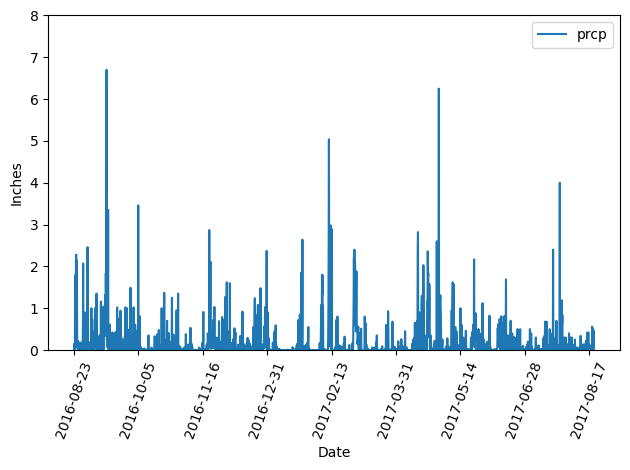

In [38]:
data_df.plot()
plt.ylim(0,8)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [39]:
# 7. Use Pandas to print the summary statistics for the precipitation data
data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
###################################################################################

In [40]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [41]:
# Design a query to calculate the total number of stations in the dataset
Session.query(func.count(station.id)).all()

[(9,)]

In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_how_many = Session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_how_many


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
Session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_highest = station_how_many[0][0]

results = Session.query(measurement.date, measurement.tobs).filter(measurement.date >= "2016-08-24").filter(measurement.date <= "2017-08-23").filter(measurement.station == station_highest).all()

# convert to dataframe
results_df = pd.DataFrame(results)
results_df.head(12)



,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
5,2016-08-29,78.0
6,2016-08-30,77.0
7,2016-08-31,78.0
8,2016-09-01,80.0
9,2016-09-02,80.0


<Axes: ylabel='Frequency'>

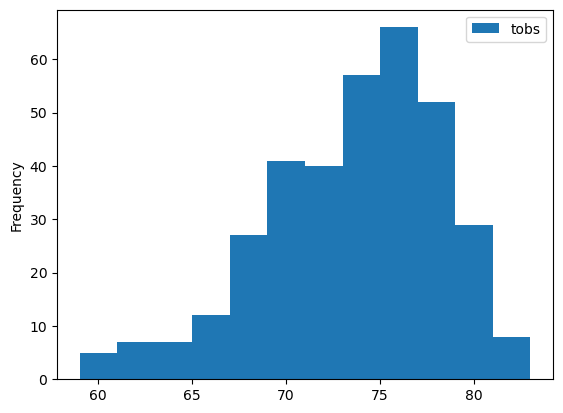

In [45]:
# historgram 
results_df.plot.hist(bins=12)

In [46]:
# Close Session
Session.close()